# Twitter Business
## Helping Start-Ups Scale Through Increased Twitter Engagement 

### Overview

Our client is a FinTech company looking to scale their customer acquisition efforts. They know that their target market are people who care deeply about their finances, and actively discuss finances in their everyday lives. They are also tech-savvy and are open to trying new digital & mobile experiences when interacting with their money (early adopters).

Our client wishes to use their marketing budget wisely. They are aware that the best kind of marketing is 'word of mouth' marketing and want to produce content that will most likely get shared and retweeted by their followers.

Our goal is to help our client identify the kind of content that will engage most with their audience.

Our target variable is retweets. We want to identify what factors lead to the most retweets.

### Data
We used Twitter's API to extract user and tweet information, querying our tweet requests by content that was specific to finacial terminology.

In [360]:
import sys
sys.path.append("..")
# Import necessary python packages and functions
from Py_Files.imports import *
from Py_Files.max_range import *
%matplotlib inline

In [361]:
df = pd.read_csv('../Data/Twitter_Data_Final.csv', index_col=0)

In [362]:
df.head()

,tweets_created_at,tweets_id,tweets_is_quote_status,tweets_favorited,tweets_favorite_count,tweets_retweeted,tweets_retweet_count,tweets_user_id,tweets_user_name,tweet_user_screen_name,tweets_user_location,tweets_user_description,tweets_user_friends_count,tweets_user_followers_count,tweets_user_favourites_count,tweets_user_geo_enabled,tweets_user_verified,tweets_user_statuses_count,tweets_user_profile_background_color,tweets_user_profile_text_color,tweets_user_profile_use_background_image,tweets_user_has_extended_profile,tweets_user_default_profile_image,deets_possibly_sensitive,deets_text,deets_reply_count,deets_like_count,deets_quote_count,users_id,users_created_at,users_description,users_name,users_username,users_verified,users_protected,users_url,users_followers_count,users_following_count,users_tweet_count,users_listed_count,users_expanded_url,users_display_url,deets_text_word_length,deets_text_character_length,users_description_word_length,users_description_character_length
5,2020-02-01 21:03:32+00:00,1223713514780409856,False,False,0,False,0,374729426,Tickeron,Tickeron,"Sunnyvale, CA",Follow us to receive trading signals from our ...,796,1691,53,False,False,400355,C0DEED,333333,True,False,True,False,$NYLD.A's Aroon indicator drops into Downtrend...,0.0,0.0,0.0,374729426.0,2011-09-16 20:46:39+00:00,Follow us to receive trading signals from our ...,Tickeron,Tickeron,False,False,https://t.co/zOu1QMv33R,1689.0,796.0,401854.0,46.0,https://ilikeai.tickeron.com,ilikeai.tickeron.com,29.0,257.0,9.0,50.0
9,2020-02-01 21:02:49+00:00,1223713336858013696,False,False,0,False,0,374729426,Tickeron,Tickeron,"Sunnyvale, CA",Follow us to receive trading signals from our ...,796,1691,53,False,False,400355,C0DEED,333333,True,False,True,False,$OSIS's Aroon indicator reaches into Uptrend o...,0.0,0.0,0.0,374729426.0,2011-09-16 20:46:39+00:00,Follow us to receive trading signals from our ...,Tickeron,Tickeron,False,False,https://t.co/zOu1QMv33R,1689.0,796.0,401854.0,46.0,https://ilikeai.tickeron.com,ilikeai.tickeron.com,29.0,257.0,9.0,50.0
12,2020-02-01 21:02:39+00:00,1223713294764126210,False,False,0,False,23,549787359,Rebellious Val,RebelliousVal,"Chicago, IL",@RebelliousMag #Chicago #feminist #Rebellious ...,5001,1906,133043,False,False,217412,C0DEED,333333,True,True,False,False,RT @ToddLighty: Investing in the newsroom; not...,0.0,0.0,0.0,549787359.0,2012-04-10 01:29:06+00:00,@RebelliousMag #Chicago #feminist #Rebellious ...,Rebellious Val,RebelliousVal,False,False,https://t.co/Q8IrJfesgx,1906.0,5001.0,217526.0,223.0,http://rebelliousmagazine.com,rebelliousmagazine.com,23.0,140.0,10.0,124.0
14,2020-02-01 21:02:32+00:00,1223713266586865665,False,False,0,False,3014,354834711,Thabi weArrows,ThabiBear,"Love Shack, No Man's Land","Tree Hugger, Loves Dogs and Shoes. Bookworm. S...",972,3574,12647,True,False,146607,FF6699,362720,True,True,False,False,RT @morganhousel: Investing. https://t.co/qQQ...,0.0,0.0,0.0,354834711.0,2011-08-14 11:22:33+00:00,"Tree Hugger, Loves Dogs and Shoes. Bookworm. S...",Thabi weArrows,ThabiBear,False,False,None,3579.0,972.0,146673.0,51.0,None,None,4.0,53.0,23.0,138.0
15,2020-02-01 21:02:13+00:00,1223713186471276544,False,False,0,False,3014,153654827,Хуёвые Вести:,nickotin,мир,Слово Правды Убивает Империи,1135,1389,6427,False,False,108120,C0DEED,333333,True,False,False,False,RT @morganhousel: Investing. https://t.co/qQQ...,0.0,0.0,0.0,153654827.0,2010-06-09 03:24:29+00:00,Слово Правды Убивает Империи,Хуёвые Вести:,nickotin,False,False,https://t.co/ozmBsv7L1T,1391.0,1138.0,108217.0,129.0,https://www.facebook.com/oleg.conspirolog,facebook.com/oleg.conspirol…,4.0,53.0,4.0,28.0


In [363]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweets_id,11739.0,1.223012e+18,4.853323e+14,1.220920e+18,1.223024e+18,1.223157e+18,1.223274e+18,1.223758e+18
tweets_favorite_count,11739.0,1.730641e+00,2.328899e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.755000e+03
tweets_retweet_count,11739.0,4.360884e+02,1.915491e+03,0.000000e+00,0.000000e+00,3.000000e+00,3.900000e+01,3.937000e+04
tweets_user_id,11739.0,2.798089e+17,4.390472e+17,6.590000e+03,1.720226e+08,1.016454e+09,7.602886e+17,1.220727e+18
tweets_user_friends_count,11739.0,2.182341e+03,2.017331e+03,0.000000e+00,6.700000e+02,1.566000e+03,3.388000e+03,1.536100e+04
tweets_user_followers_count,11739.0,3.221495e+03,2.183035e+03,9.450000e+02,1.547500e+03,2.385000e+03,4.365500e+03,9.998000e+03
tweets_user_favourites_count,11739.0,3.326322e+04,7.176625e+04,0.000000e+00,6.560000e+02,6.773000e+03,3.330000e+04,1.311211e+06
tweets_user_statuses_count,11739.0,1.576861e+05,4.160138e+05,2.000000e+00,9.541500e+03,3.216800e+04,1.037850e+05,3.441757e+06
deets_reply_count,11739.0,8.599540e-01,6.273995e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.766000e+03
deets_like_count,11739.0,1.799983e+00,2.509561e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.989000e+03


In [364]:
df.isna().sum()

tweets_created_at                           0
tweets_id                                   0
tweets_is_quote_status                      0
tweets_favorited                            0
tweets_favorite_count                       0
tweets_retweeted                            0
tweets_retweet_count                        0
tweets_user_id                              0
tweets_user_name                            0
tweet_user_screen_name                      0
tweets_user_location                        0
tweets_user_description                     0
tweets_user_friends_count                   0
tweets_user_followers_count                 0
tweets_user_favourites_count                0
tweets_user_geo_enabled                     0
tweets_user_verified                        0
tweets_user_statuses_count                  0
tweets_user_profile_background_color        0
tweets_user_profile_text_color              0
tweets_user_profile_use_background_image    0
tweets_user_has_extended_profile  

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11739 entries, 5 to 39372
Data columns (total 46 columns):
tweets_created_at                           11739 non-null object
tweets_id                                   11739 non-null int64
tweets_is_quote_status                      11739 non-null bool
tweets_favorited                            11739 non-null bool
tweets_favorite_count                       11739 non-null int64
tweets_retweeted                            11739 non-null bool
tweets_retweet_count                        11739 non-null int64
tweets_user_id                              11739 non-null int64
tweets_user_name                            11739 non-null object
tweet_user_screen_name                      11739 non-null object
tweets_user_location                        11739 non-null object
tweets_user_description                     11739 non-null object
tweets_user_friends_count                   11739 non-null int64
tweets_user_followers_count                 

## Preprocessing Data
Before moving into modeling, it is important that our cleaned data is also adequately prepared for analysis, as poorkly preopared data can skew our predictions and may lead to overfitting or a poor performing model in general.

### Feature Engineering
We decided create 5 new features.....

In [366]:
df.loc[df['tweets_retweet_count'] <= 100, 'retweet_class'] = 0
df.loc[(df['tweets_retweet_count'] > 100) & (df['tweets_retweet_count'] <= 1000), 'retweet_class'] = 1
df.loc[df['tweets_retweet_count'] > 1000, 'retweet_class'] = 2

In [367]:
df = df.drop([
    'tweets_id',
    'tweets_user_name',
    'tweet_user_screen_name',
    'tweets_user_profile_background_color',
    'tweets_user_profile_text_color',
    'users_name',
    'users_username',
    'users_url',
    'users_expanded_url',
    'users_display_url',
    'tweets_retweet_count',
    'tweets_created_at',
    'tweets_user_location',
    'users_created_at',
    'tweets_user_description',
    'deets_text',
    'users_description',
    'tweets_user_id',
    'users_id',
    'tweets_user_verified',
    'users_description_word_length',
    'deets_text_word_length'
    ], axis=1)

In [368]:
df = df.reset_index(drop=True)


In [369]:
df.head()

,tweets_is_quote_status,tweets_favorited,tweets_favorite_count,tweets_retweeted,tweets_user_friends_count,tweets_user_followers_count,tweets_user_favourites_count,tweets_user_geo_enabled,tweets_user_statuses_count,tweets_user_profile_use_background_image,tweets_user_has_extended_profile,tweets_user_default_profile_image,deets_possibly_sensitive,deets_reply_count,deets_like_count,deets_quote_count,users_verified,users_protected,users_followers_count,users_following_count,users_tweet_count,users_listed_count,deets_text_character_length,users_description_character_length,retweet_class
0,False,False,0,False,796,1691,53,False,400355,True,False,True,False,0.0,0.0,0.0,False,False,1689.0,796.0,401854.0,46.0,257.0,50.0,0.0
1,False,False,0,False,796,1691,53,False,400355,True,False,True,False,0.0,0.0,0.0,False,False,1689.0,796.0,401854.0,46.0,257.0,50.0,0.0
2,False,False,0,False,5001,1906,133043,False,217412,True,True,False,False,0.0,0.0,0.0,False,False,1906.0,5001.0,217526.0,223.0,140.0,124.0,0.0
3,False,False,0,False,972,3574,12647,True,146607,True,True,False,False,0.0,0.0,0.0,False,False,3579.0,972.0,146673.0,51.0,53.0,138.0,2.0
4,False,False,0,False,1135,1389,6427,False,108120,True,False,False,False,0.0,0.0,0.0,False,False,1391.0,1138.0,108217.0,129.0,53.0,28.0,2.0


### Train, Test, Split
We are splitting our data with 80% for training, 20% for testing.

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
y = df['retweet_class']
X = df.drop('retweet_class', axis=1)


In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=10)

### Scaling Data
As we can see, we have a lot of numerical variables that exist on their independent scales (A like is jnot the same as a retweet). Therefore, in order to analyze these variables, we need to level the playing feield and standardize our scale.

In [148]:
ss = StandardScaler()

In [149]:
X_train_ss = ss.fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
clf = RandomForestClassifier(n_estimators = 1000, #number of trees
                             criterion = 'gini', #traditional "Entropy" equation or "Gini"
                             max_features = None, #how many variables (features) in each tree (you can use log2, sqrt, auto, or None (which means "max features"))
                             max_depth = 10, # Hopw deep we wanbt our treee to be
                             oob_score= True) #Out Of Bag score (set to True to show this)

In [152]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [153]:
clf.oob_score_

0.8405920562240443

In [154]:
from sklearn.model_selection import cross_validate

In [155]:
validator = cross_validate(
    clf,
    X_train,
    y_train,
    return_train_score = True,
    return_estimator = True,
    cv = 5,
    n_jobs = -1)

In [156]:
mean_train = np.mean(validator['train_score'])
std_train = np.std(validator['train_score'])

In [157]:
print("Train score: %.3f +/- %.3f"%(mean_train, std_train))

Train score: 0.900 +/- 0.003


In [158]:
clf.feature_importances_

array([0.01388629, 0.        , 0.00374982, 0.        , 0.03380049,
       0.03085703, 0.2384997 , 0.00794922, 0.05095462, 0.0037222 ,
       0.00990711, 0.00575078, 0.00167073, 0.00099626, 0.00507915,
       0.00139329, 0.00044555, 0.        , 0.03210424, 0.03473819,
       0.04875929, 0.12579846, 0.28350554, 0.06643205])

In [159]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')


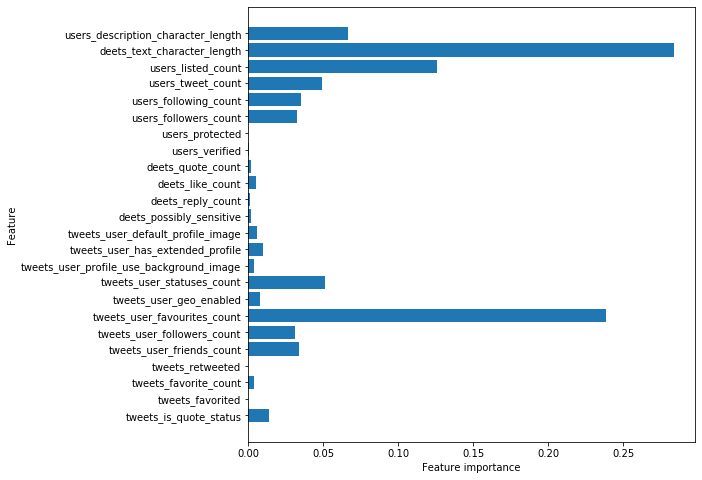

In [160]:
plot_feature_importances(clf)

In [370]:
df.head()

,tweets_is_quote_status,tweets_favorited,tweets_favorite_count,tweets_retweeted,tweets_user_friends_count,tweets_user_followers_count,tweets_user_favourites_count,tweets_user_geo_enabled,tweets_user_statuses_count,tweets_user_profile_use_background_image,tweets_user_has_extended_profile,tweets_user_default_profile_image,deets_possibly_sensitive,deets_reply_count,deets_like_count,deets_quote_count,users_verified,users_protected,users_followers_count,users_following_count,users_tweet_count,users_listed_count,deets_text_character_length,users_description_character_length,retweet_class
0,False,False,0,False,796,1691,53,False,400355,True,False,True,False,0.0,0.0,0.0,False,False,1689.0,796.0,401854.0,46.0,257.0,50.0,0.0
1,False,False,0,False,796,1691,53,False,400355,True,False,True,False,0.0,0.0,0.0,False,False,1689.0,796.0,401854.0,46.0,257.0,50.0,0.0
2,False,False,0,False,5001,1906,133043,False,217412,True,True,False,False,0.0,0.0,0.0,False,False,1906.0,5001.0,217526.0,223.0,140.0,124.0,0.0
3,False,False,0,False,972,3574,12647,True,146607,True,True,False,False,0.0,0.0,0.0,False,False,3579.0,972.0,146673.0,51.0,53.0,138.0,2.0
4,False,False,0,False,1135,1389,6427,False,108120,True,False,False,False,0.0,0.0,0.0,False,False,1391.0,1138.0,108217.0,129.0,53.0,28.0,2.0


In [323]:
p_df = df[['deets_text_character_length', 'retweet_class']]

In [359]:
p_df.describe()

,deets_text_character_length,retweet_class
count,11739.000000,11739.000000
mean,162.216884,0.250362
std,63.629625,0.577831
min,16.000000,0.000000
25%,139.000000,0.000000
50%,140.000000,0.000000
75%,173.000000,0.000000
max,916.000000,2.000000


In [343]:
ns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)

NameError: name 'ns' is not defined

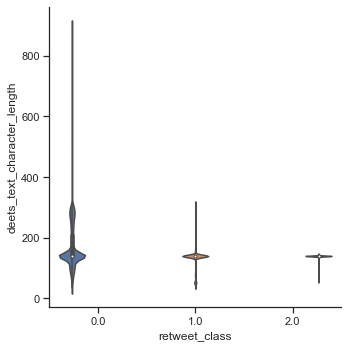

In [299]:
sns.catplot(x="retweet_class", y="deets_text_character_length", hue="retweet_class",
            kind="violin", bw=.15, cut=0,
            data=p_df)

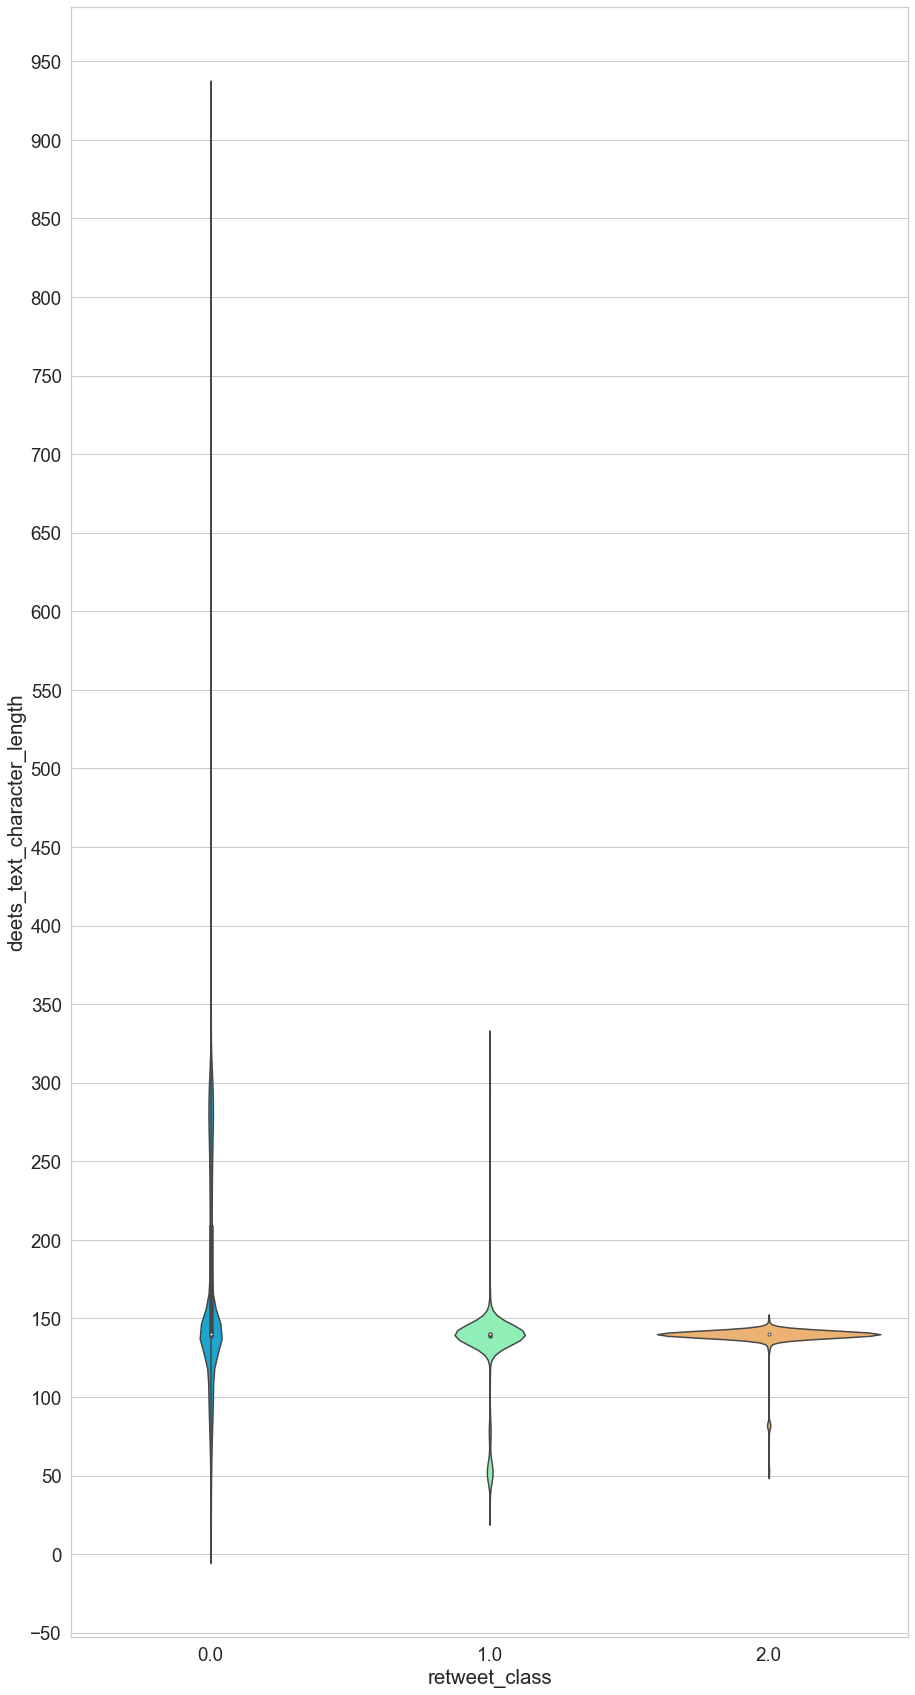

In [353]:
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(15,30)
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
sns.violinplot(x="retweet_class", y="deets_text_character_length", data=p_df, palette='rainbow')
plt.savefig('../Images/tweet_character_length.png', transparent=True, dpi=150, bbox_inches='tight')

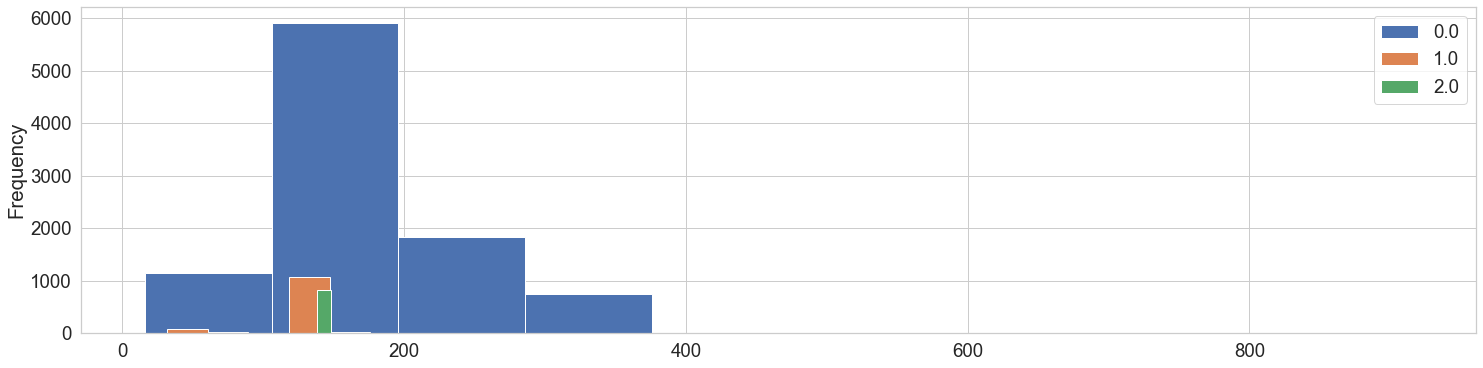

In [354]:
fig, ax = plt.subplots(figsize=(25,6))
for label, df in p_df.groupby('retweet_class'):
    df.deets_text_character_length.plot(kind="hist", ax=ax, label=label)
plt.legend()

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

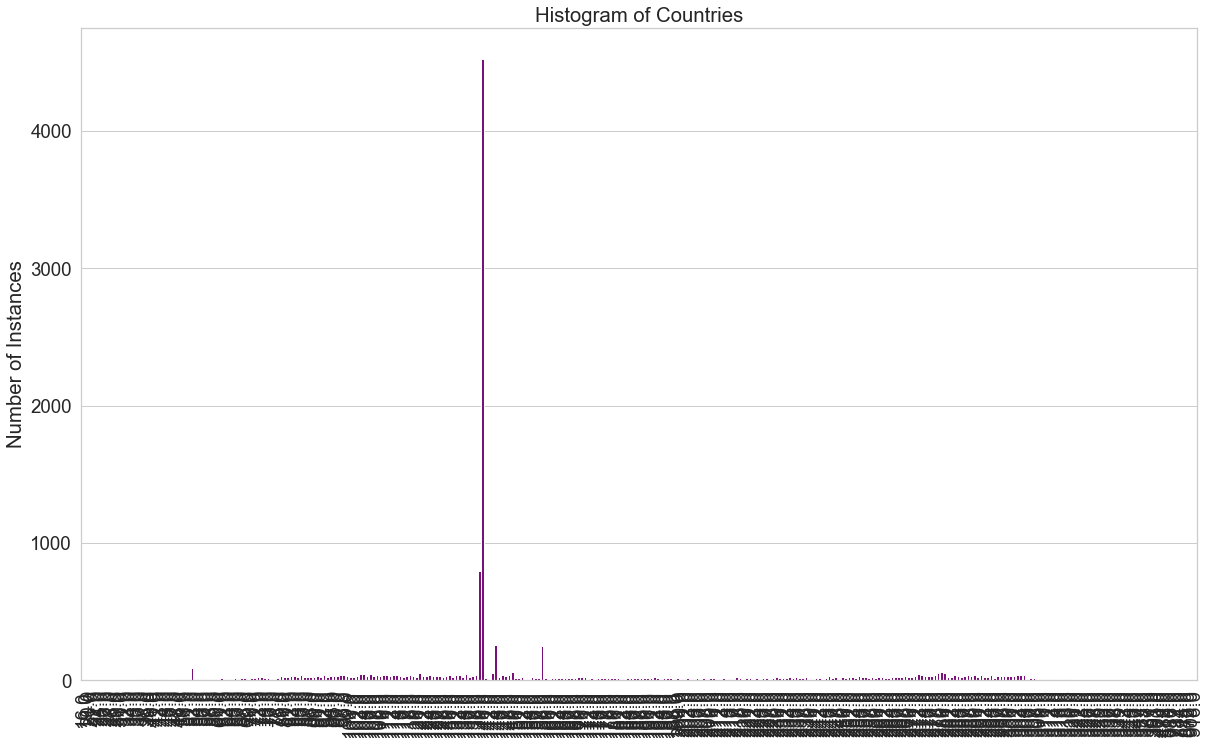

In [355]:
barplot_dims = (20, 12)
fig, ax = plt.subplots(figsize = barplot_dims)
sns.barplot(x=tweet_character_length.index, y=tweet_character_length, ax=ax, color='darkmagenta')

plt.title("Histogram of Countries")
plt.ylabel("Number of Instances")
#plt.xlabel("Provinces")
plt.xticks(rotation=90)

(11739, 25)

### Log Transformation

### Scaling Variables